# Hackathon 1, statistics.

This project illustrates the course LEPL1109. You will study the emission of PM2.5 fine particles in Shanghai and Beijing, measured by US embassy/offices. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution. 


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “Hackathons” on Moodle and the subsection “Remise Hackathon 1”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Decaluwé Maxime - 50802200

Part. 2: Defrenne Simon - 42242200

Part. 3: Mil-Homens Cavaco Mathieu - 38282200
 
Part. 4: Peiffer Thibaut - 47352200

Part. 5: Roekens Raphaël - 70732200

Part. 6: Starck Robin - 88952200


# Air quality in China


PM2.5 consists of airborne particles with aerodynamic diameters less than 2.5 μm. They are known to adversely affect human
health. The U.S. Embassy in Beijing started releasing hourly PM2.5 readings in April 2008, followed by the consulates in Guangzhou, Shanghai, Chengdu, and Shenyang in November and December 2011, June 2012, and April 2013, respectively. China’s Ministry of Environmental Protection (MEP) began to report hourly PM2.5 data in 74 cities (which include the five cities with the U.S. diplomatic posts) from January 2013, which was extended to 338 cities in January 2015.

The time period for this data is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as NA.

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* season: season of data in this row
* PM: PM2.5 concentration (µg/m^3)
* DEWP: Dew Point (Celsius Degree)
* TEMP: Temperature (Celsius Degree)
* HUMI: Humidity (%)
* PRES: Pressure (hPa)
* cbwd: Combined wind direction
* Iws: Cumulated wind speed (m/s)
* precipitation: hourly precipitation (mm)
* Iprec: Cumulated precipitation (mm)

Reference: 

Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220-10236.


In [1]:
# Imports
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm


## 1. Basic statistics


------------------------------------------------------------------------------------------------------
1.1. We will focus on PM2.5 hourly measurements done by the US offices between the 1/1/2012 and 31/12/2015 in Beijing and Shanghai. 

a) Load datasets and merge them. Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Shanghai and Beijing (PM_US_Post). Notice that in a later question, you will also need PM2.5 emissions measured in Nongzhanguan.

Use the field 'season' to split the data of Shanghai and Bejing into:
* one sample for winter (season=4), 
* one sample for summer (season=2).
------------------------------------------------------------------------------------------------------

In [2]:
#Load les csv en dataframe
beijing_df = pd.read_csv('BeijingPM.csv')
shanghai_df = pd.read_csv('ShanghaiPM.csv')

#Définir la colonne qu'on analyse
target_column = 'PM_US Post'
year = 'year'

#Filtrer les dataframe de façon à ne garder que les entrées où on a une valeur pour Shanghai et Beijing
valid_beijing = beijing_df[~pd.isna(beijing_df[target_column]) & ~pd.isna(shanghai_df[target_column]) & (beijing_df[year] > 2011) & (beijing_df[year] < 2016)]
valid_shanghai = shanghai_df[~pd.isna(beijing_df[target_column]) & ~pd.isna(shanghai_df[target_column]) & (shanghai_df[year] > 2011) & (shanghai_df[year] < 2016)]

#Filtrer les dataframe "communs" en saison summer et winter
valid_beijing_winter = valid_beijing[valid_beijing["season"] == 4]
valid_shanghai_winter = valid_shanghai[valid_shanghai["season"] == 4]

valid_beijing_summer = valid_beijing[valid_beijing["season"] == 2]
valid_shanghai_summer = valid_shanghai[valid_shanghai["season"] == 2]

b) Calculate the mean, variance, median, 25% and 75% quantiles of emissions during winter and summer in Shanghai and Beijing. Present them in clean table. Comment your results.

In [3]:
# Code here
# À faire pour les deux en même temps ? (moyenne/variance/mediane globale ?)
be_mean_winter = valid_beijing_winter.loc[:, target_column].mean()
be_mean_summer = valid_beijing_summer.loc[:, target_column].mean()
sh_mean_winter = valid_shanghai_winter.loc[:, target_column].mean()
sh_mean_summer = valid_shanghai_summer.loc[:, target_column].mean()

be_var_winter = valid_beijing_winter.loc[:, target_column].var()
be_var_summer = valid_beijing_summer.loc[:, target_column].var()
sh_var_winter = valid_shanghai_winter.loc[:, target_column].var()
sh_var_summer = valid_shanghai_summer.loc[:, target_column].var()

be_median_winter = valid_beijing_winter.loc[:, target_column].median()
be_median_summer = valid_beijing_summer.loc[:, target_column].median()
sh_median_winter = valid_shanghai_winter.loc[:, target_column].median()
sh_median_summer = valid_shanghai_summer.loc[:, target_column].median()

be_quant25_winter = valid_beijing_winter.loc[:, target_column].quantile(0.25)
be_quant25_summer = valid_beijing_summer.loc[:, target_column].quantile(0.25)
sh_quant25_winter = valid_shanghai_winter.loc[:, target_column].quantile(0.25)
sh_quant25_summer = valid_shanghai_summer.loc[:, target_column].quantile(0.25)

be_quant75_winter = valid_beijing_winter.loc[:, target_column].quantile(0.75)
be_quant75_summer = valid_beijing_summer.loc[:, target_column].quantile(0.75)
sh_quant75_winter = valid_shanghai_winter.loc[:, target_column].quantile(0.75)
sh_quant75_summer = valid_shanghai_summer.loc[:, target_column].quantile(0.75)


print("Beijing winter : Espérance, Déviation std, Variance, q25, q50, q75")
print([be_mean_winter,np.sqrt(be_var_winter),be_var_winter,be_quant25_winter,be_median_winter,be_quant75_winter])

print("Beijing summer : Espérance, Déviation std, Variance, q25, q50, q75")
print([be_mean_summer,np.sqrt(be_var_summer),be_var_summer,be_quant25_summer,be_median_summer,be_quant75_summer])

print("Shanghai winter : Espérance, Déviation std, Variance, q25, q50, q75")
print([sh_mean_winter,np.sqrt(sh_var_winter),sh_var_winter,sh_quant25_winter,sh_median_winter,sh_quant75_winter])

print("Shanghai summer : Espérance, Déviation std, Variance, q25, q50, q75")
print([sh_mean_summer,np.sqrt(sh_var_summer),sh_var_summer,sh_quant25_summer,sh_median_summer,sh_quant75_summer])


Beijing winter : Espérance, Déviation std, Variance, q25, q50, q75
[122.4049257515393, 124.90900715120314, 15602.260067499317, 21.0, 82.0, 180.0]
Beijing summer : Espérance, Déviation std, Variance, q25, q50, q75
[71.84084337349398, 54.5731375968239, 2978.2273471618737, 30.0, 59.0, 100.0]
Shanghai winter : Espérance, Déviation std, Variance, q25, q50, q75
[76.2700712302306, 57.532648617333955, 3310.0056569256185, 36.0, 60.0, 99.0]
Shanghai summer : Espérance, Déviation std, Variance, q25, q50, q75
[33.89180722891566, 24.728151666969172, 611.4814848646303, 16.0, 29.0, 46.0]


### Statistics for Beijing & Shanghai

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>Mean</th>
        <th>Variance</th>
        <th>25% Quantile</th>
        <th>Median</th>
        <th>75% Quantile</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>122.4049257515393</code></td>
        <td><code>15602.260067499317</code></td>
        <td><code>21.0</code></td>
        <td><code>82.0</code></td>
        <td><code>180.0</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>71.84084337349398</code></td>
        <td><code>2978.2273471618737</code></td>
        <td><code>30.0</code></td>
        <td><code>59.0</code></td>
        <td><code>100.0</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>76.2700712302306</code></td>
        <td><code>3310.0056569256185</code></td>
        <td><code>36.0</code></td>
        <td><code>60.0</code></td>
        <td><code>99.0</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>33.89180722891566</code></td>
        <td><code>611.4814848646303</code></td>
        <td><code>16.0</code></td>
        <td><code>29.0</code></td>
        <td><code>46.0</code></td>
    </tr>
</table>

Comments here:

On average, we notice that Beijing is about twice as polluted as Shanghai. Moreover, the concentration of particulate matter nearly doubles during the winter in both cities.

The high variance of the concentration in winter, especially in Beijing, indicates greater variability during this season. This means that while the average pollution level is higher, there are also significant fluctuations. We also observe a marked increase in variance in Beijing during the winter, suggesting extreme pollution events occur more frequently.

The median shows the central tendency, and in all cases, it is lower than the mean. This can be explained by exceptional events where pollution levels spike, pulling the mean upwards.

=> Explication du pourquoi 

Conclusion?


-----------------------------------------------------------------------------------------------------------------------

1.2. Draw box plots of PM2.5 emissions in Beijing and Shanghai / summer & winter (in total 4 box plots).

Search on internet, what are the recommended maximum level of PM2.5 and comment your results.

------------------------------------------------------------------------------------------------------------------------



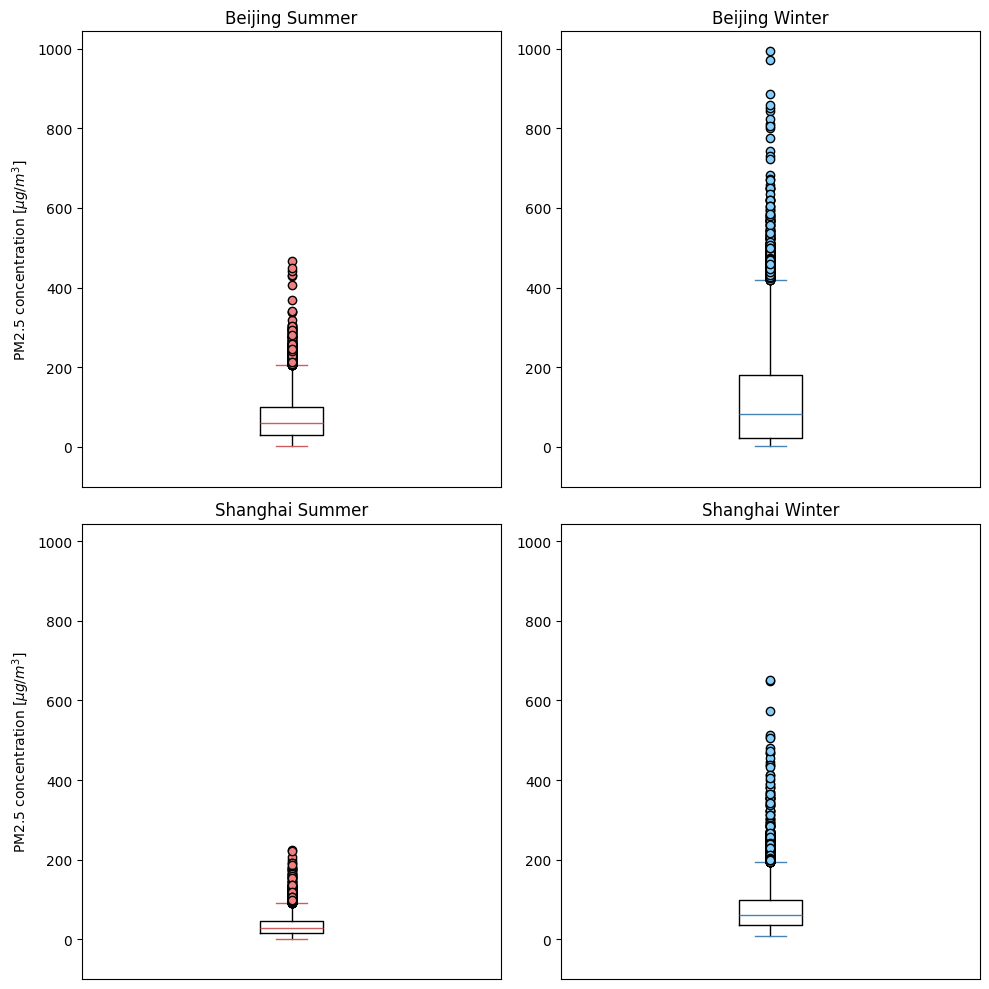

In [22]:
# Beaux plots des PM ?
# 1 box plot par ville et par saison, en prenant toutes les données d'une même saison (graphe = boite à moustache, voir internet)
# Résultats à comparer avec le niveau recommandé sur internet.

data = [
    valid_beijing_summer[target_column].to_numpy(),
    valid_beijing_winter[target_column].to_numpy(),
    valid_shanghai_summer[target_column].to_numpy(),
    valid_shanghai_winter[target_column].to_numpy()
]

# Create a figure with 4 subplots arranged in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Titles for each subplot
titles = [
    'Beijing Summer',
    'Beijing Winter',
    'Shanghai Summer',
    'Shanghai Winter'
]

y_min = -100 #min(np.min(dataset) for dataset in data) - 10
y_max = max(np.max(dataset) for dataset in data) + 50

colors = ['indianred', 'steelblue', 'indianred', 'steelblue']
outliers_colors = ['lightcoral', 'lightskyblue', 'lightcoral', 'lightskyblue']

# Iterate through each dataset and subplot
for i, (ax, dataset, title) in enumerate(zip(axs.flatten(), data, titles)):
    box = ax.boxplot(dataset, 
                     boxprops=dict(color='black'),
                     medianprops=dict(color=colors[i]),  # Color for the median line
                     whiskerprops=dict(color='black'),  # Color for whiskers
                     capprops=dict(color=colors[i]),  # Color for caps
                     flierprops=dict(markerfacecolor=outliers_colors[i], marker='o'))  # Color for outliers
    ax.set_title(title)
    if i % 2 == 0:  # Only set y-labels for left subplots (0 and 2)
        ax.set_ylabel(r'PM2.5 concentration $[µg/m^3]$') 
    ax.set_xticks([])  # Remove x-ticks
    ax.set_ylim(y_min, y_max)  # Set the same y-limits for all subplots

plt.tight_layout()
plt.show()

The boxplot indicates that PM2.5 concentrations are higher in Beijing compared to Shanghai, suggesting poorer air quality in Beijing. During the summer, there are some outliers, but they remain relatively close to the median values. However, in winter, the number of outliers increases significantly, especially in Beijing, with more extreme values. This could be attributed to the use of heating during the colder months, which often involves burning fuels that contribute to higher PM2.5 levels.

The asymmetry of the quartiles clearly stands out, confirmed by the table above. Most of the data is centered around the median, but some extreme outliers greatly influence the mean. The asymmetry of the quartiles led us to fit a Gamma distribution to the dataset.



## 2. Fit of distributions 


------------------------------------------------------------------------------------------------------

2.1. Fit a Gamma distribution to PM2.5 emissions in Beijing and Shanghai (winter & summer). Warning, in python, the Gamma distribution has a parameter of location which translate the distribution from $[0,+\infty)$ to $[loc,+\infty)$. Force its value to zero during the calibration (option floc=0) to consider only positive values.

a) Estimate Gamma parameters by log-likelihood maximization (MLE). Present them in a clean table **AND** calculate the log-likelihood.  

------------------------------------------------------------------------------------------------------

In [5]:
# définition des listes de datas
US_data_beijing_summer = valid_beijing_summer[target_column].to_numpy()
US_data_beijing_winter = valid_beijing_winter[target_column].to_numpy()
US_data_shangai_summer = valid_shanghai_summer[target_column].to_numpy()
US_data_shangai_winter = valid_shanghai_winter[target_column].to_numpy()

# MLE sur chaque groupe de data
beijing_fit_summer = st.gamma.fit(US_data_beijing_summer, floc=0) # !attention, floc=0 important partout!
beijing_fit_winter = st.gamma.fit(US_data_beijing_winter, floc=0)
shangai_fit_summer = st.gamma.fit(US_data_shangai_summer,floc=0)
shangai_fit_winter = st.gamma.fit(US_data_shangai_winter, floc=0)

b) Plot the 4 histograms of PM2.5 and add the fitted gamma pdf’s on the same plot. What is your overall feeling about the quality of estimation?

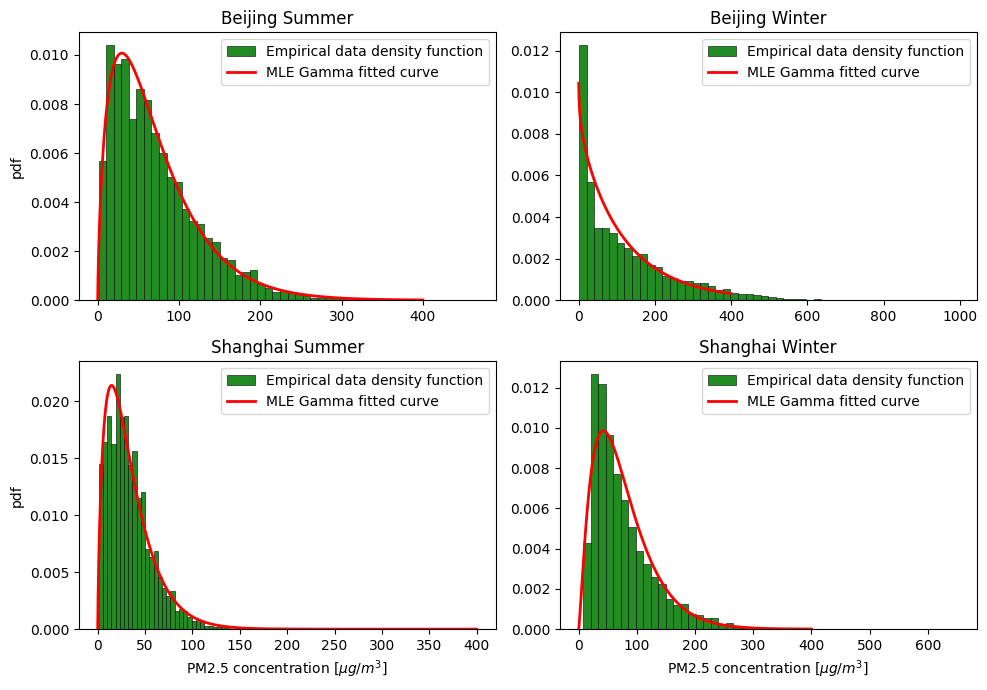

In [6]:
# grouper les datas par classes
data = [US_data_beijing_summer, US_data_beijing_winter, US_data_shangai_summer, US_data_shangai_winter] #Imbriquer les listes
data_gamma = [beijing_fit_summer, beijing_fit_winter, shangai_fit_summer, shangai_fit_winter]
x = np.linspace(0,400,1000)

n = [50,50,50,50]  #nombre de batonnets (à ajuster)
tittles = ['Beijing Summer','Beijing Winter','Shanghai Summer','Shanghai Winter']
colors = ['forestgreen', 'forestgreen', 'forestgreen', 'forestgreen']
place = [[0,0],[0,1],[1,0],[1,1]]


fig, axs = plt.subplots(2, 2, figsize=(10, 7))


for i in range(4): 

    Curr_Place = place[i][0],place[i][1]
    count, bins, ignored = axs[Curr_Place].hist(data[i], n[i], density=True, color=colors[i], \
                                                             label = 'Empirical data density function',edgecolor='black', linewidth=0.4)
    axs[Curr_Place].plot(x, st.gamma.pdf(x,*(data_gamma[i])), linewidth=2, color='r', label='MLE Gamma fitted curve')
    axs[Curr_Place].set_title(titles[i])
    
    if i % 2 == 0:
        axs[Curr_Place].set_ylabel(r'pdf')
    if i>1:
        axs[Curr_Place].set_xlabel(r'PM2.5 concentration $[µg/m^3]$')


    axs[Curr_Place].legend()
    

plt.tight_layout()
plt.show()





The histogram of the empirical data closely matches the Gamma distribution fitted using MLE, indicating that the Gamma distribution is a good fit for the data. The MLE parameters accurately capture the shape and skewness, suggesting that the data follows a Gamma-like pattern. Minor deviations in the tails might reflect noise or slight model limitations, but overall, the fit is strong and appropriate for this dataset. We calculated the values of the likelihood of each MLE, and we obtained respectively -43155, -48005, -36870 and -275668. This confirms that the MLE of Shanghai Winter is the most different from his data.


------------------------------------------------------------------------------------------------------

2.2. You have fitted 4 gamma random variables to PM2.5 emissions in Shanghai, Beijing during summer and winter.

* Present the anatytical formulas of the mean and standard deviation of a gamma distribution. Calculate the expected levels and the standard devations of the PM2.5 emissions (in Shanghai, Beijing during summer and winter) relying on the fitted gamma random variables. 
* Calculate the 25%, 50% and 75% percentiles of these gamma distributions.
* Compare your results with the empirical statistics previously computed. Please comment your results.

------------------------------------------------------------------------------------------------------

### Formules analytiques de la loi Γ 



$$ f_\Gamma(x,\alpha, \beta) = \frac{1}{\Gamma(\alpha) \beta^\alpha} x^{\alpha-1} \exp(-\frac{x}{\beta})$$

with: $ \Gamma(\alpha) = \int_{0}^{+\infty} t^{\alpha-1}e^{-t}dt $

Moreover, 
$$ \mathbb{E}[\Gamma] = \alpha \beta , \quad \mathbb{V}[\Gamma] = \sigma^2 = \alpha \beta^2$$



In [7]:
# Calcul de l'espérance et de l'écart type de la Gamma calculée
E_beijing_fit_summer = st.gamma.mean(*beijing_fit_summer)
sigma_beijing_fit_summer = st.gamma.std(*beijing_fit_summer)
q25_beijing_fit_summer = st.gamma.ppf(0.25, *beijing_fit_summer)
q50_beijing_fit_summer = st.gamma.ppf(0.50, *beijing_fit_summer)
q75_beijing_fit_summer = st.gamma.ppf(0.75, *beijing_fit_summer)
print("Beijing summer : Espérance, Déviation std, q25, q50, q75")
print([E_beijing_fit_summer,sigma_beijing_fit_summer,q25_beijing_fit_summer,q50_beijing_fit_summer,q75_beijing_fit_summer])

E_beijing_fit_winter = st.gamma.mean(*beijing_fit_winter)
sigma_beijing_fit_winter = st.gamma.std(*beijing_fit_winter)
q25_beijing_fit_winter = st.gamma.ppf(0.25, *beijing_fit_winter)
q50_beijing_fit_winter = st.gamma.ppf(0.50, *beijing_fit_winter)
q75_beijing_fit_winter = st.gamma.ppf(0.75, *beijing_fit_winter)
print("Beijing winter : Espérance, Déviation std, q25, q50, q75")
print([E_beijing_fit_winter,sigma_beijing_fit_winter,q25_beijing_fit_winter,q50_beijing_fit_winter,q75_beijing_fit_winter])

E_shangai_fit_summer = st.gamma.mean(*shangai_fit_summer)
sigma_shangai_fit_summer = st.gamma.std(*shangai_fit_summer)
q25_shangai_fit_summer = st.gamma.ppf(0.25, *shangai_fit_summer)
q50_shangai_fit_summer = st.gamma.ppf(0.50, *shangai_fit_summer)
q75_shangai_fit_summer = st.gamma.ppf(0.75, *shangai_fit_summer)
print("Shangai summer : Espérance, Déviation std, q25, q50, q75")
print([E_shangai_fit_summer,sigma_shangai_fit_summer,q25_shangai_fit_summer,q50_shangai_fit_summer,q75_shangai_fit_summer])

E_shangai_fit_winter = st.gamma.mean(*shangai_fit_winter)
sigma_shangai_fit_winter = st.gamma.std(*shangai_fit_winter)
q25_shangai_fit_winter = st.gamma.ppf(0.25, *shangai_fit_winter)
q50_shangai_fit_winter = st.gamma.ppf(0.50, *shangai_fit_winter)
q75_shangai_fit_winter = st.gamma.ppf(0.75, *shangai_fit_winter)
print("Shangai winter : Espérance, Déviation std, q25, q50, q75")
print([E_shangai_fit_winter,sigma_shangai_fit_winter,q25_shangai_fit_winter,q50_shangai_fit_winter,q75_shangai_fit_winter])


Beijing summer : Espérance, Déviation std, q25, q50, q75
[71.84084337349398, 55.08648062781376, 31.494866041648617, 58.35607189534869, 97.71242329768053]
Beijing winter : Espérance, Déviation std, q25, q50, q75
[122.40492575153928, 126.25998946646783, 32.99185815321611, 82.70976626170342, 169.6988241568358]
Shangai summer : Espérance, Déviation std, q25, q50, q75
[33.89180722891566, 25.55602954600824, 15.160289901115316, 27.72942369911224, 46.005219524798854]
Shangai winter : Espérance, Déviation std, q25, q50, q75
[76.2700712302306, 50.84497822976636, 38.88919743821538, 65.31762644566727, 101.84856903661976]


### Statistics for Beijing & Shanghai

<table>
    <tr>
        <th rowspan="2">City</th>
        <th rowspan="2">Season</th>
        <th>MLE Mean</th>
        <th>MLE Standard deviation</th>
        <th>MLE 25% Quantile</th>
        <th>MLE Median</th>
        <th>MLE 75% Quantile</th>
    </tr>
    <tr></tr>
    <tr>
        <td rowspan="2">Beijing</td>
        <td>Winter</td>
        <td><code>121.943443</code></td>
        <td><code>126.838489</code></td>
        <td><code>32.426657</code></td>
        <td><code>81.554980</code></td>
        <td><code>168.635557</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>71.840843</code></td>
        <td><code>55.086480</code></td>
        <td><code>31.494866</code></td>
        <td><code>58.356071</code></td>
        <td><code>97.712423</code></td>
    </tr>
    <tr>
        <td rowspan="2">Shanghai</td>
        <td>Winter</td>
        <td><code>76.270071</code></td>
        <td><code>50.844978</code></td>
        <td><code>38.889197</code></td>
        <td><code>65.317626</code></td>
        <td><code>101.848569</code></td>
    </tr>
    <tr>
        <td>Summer</td>
        <td><code>33.891787</code></td>
        <td><code>25.403505</code></td>
        <td><code>15.262996</code></td>
        <td><code>27.833132</code></td>
        <td><code>46.011454</code></td>
    </tr>
</table>

Comment here :

------------------------------------------------------------------------------------------------------

2.3. The quality of the MLE estimators depends upon many factors. One way to estimate it is to bootstrap the dataset. We will focus here exclusively on PM2.5 emissions in Beijing, during the winter time.

* Bootstrap 1000 times a sample of 6000 daily emissions for Beijing (winter) and plot an histogram of estimated alpha and scale parameters.

* Compute a 5% confidence interval for parameter(s) estimates for the best distribution obtained by MLE. 

* How do you interpret the results? Is the accuracy good?

------------------------------------------------------------------------------------------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  0.9401674  130.26245225]


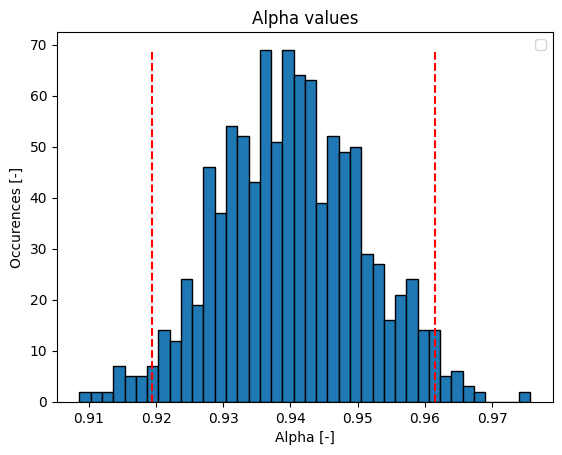

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


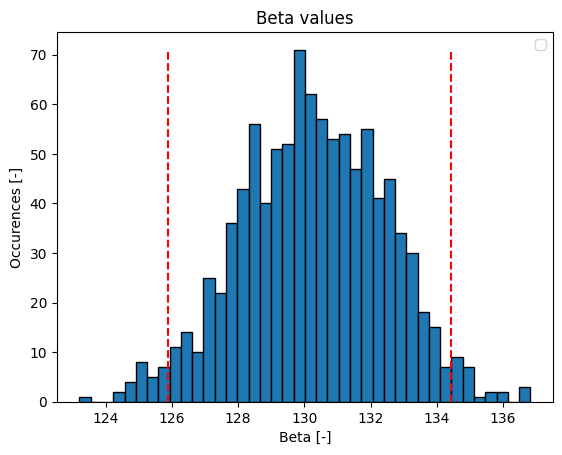

In [8]:
# FAIRE 1000 échantillons de 6000 (100,600 pour compiler vite)

#bootstrap algo
result = np.zeros((2,1000))
for i in range (1000):
    sample = np.random.choice(valid_beijing_winter[target_column], 6000, replace=True )
    prediction = st.gamma.fit(sample,floc=0)
    result[0,i]= prediction[0]
    result[1,i]= prediction[2]

mean_param = result.mean(1)
print(mean_param)

#confidence interval
alpha_lower = np.percentile(result[0], 2.5)
alpha_upper = np.percentile(result[0], 97.5)
beta_lower = np.percentile(result[1], 2.5)
beta_upper = np.percentile(result[1], 97.5)

#histograms 

#alpha param
alphabins = 40 #[0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1,1.05]
a_Occ, a_bins, a_garbage = plt.hist(result[0],bins=alphabins, density=False,edgecolor='black')
a_Max = max(a_Occ)

plt.vlines(alpha_lower,0,a_Max,linestyles='dashed',color ='red')
plt.vlines(alpha_upper,0,a_Max,linestyles='dashed',color ='red')
plt.title('Alpha values')
plt.xlabel('Alpha [-]')
plt.ylabel('Occurences [-]')
plt.legend()
plt.show()

#scale param
betabins = 40 #[80,90,100,110,120,130,140,150,160,170,180,190,200]
b_Occ, b_bins, b_garbage = plt.hist(result[1],bins=betabins, density=False, edgecolor='black')
b_Max = max(b_Occ)

plt.vlines(beta_lower,0,b_Max,linestyles='dashed',color ='red')
plt.vlines(beta_upper,0,b_Max,linestyles='dashed',color ='red')
plt.title('Beta values')
plt.xlabel('Beta [-]')
plt.ylabel('Occurences [-]')
plt.legend()
plt.show()


    

In [9]:
#def stat_func(data):
#   return st.gamma.fit(data)[:1]

#data = (valid_beijing_winter,)  # samples must be in a sequence

#res = bootstrap(data,stat_func,n_resamples=1000,size=6000,vectorized=False)
#fig, ax = plt.subplots()
#ax.hist(res.bootstrap_distribution, bins=25)
#ax.set_title('Bootstrap Distribution')
#ax.set_xlabel('statistic value')
#ax.set_ylabel('frequency')
#plt.show()

Comments here:

In both cases, the histograms are fairly centered around specific values, indicating that the MLE estimator consistently produces similar results across different bootstrap samples, suggesting reasonably good accuracy.

Additionally, since the distribution is relatively narrow, the MLE estimates appear to be quite precise.

The confidence intervals also capture the central values in both histograms, implying that there is low uncertainty surrounding the estimated parameters.

However, there is a noticeable skewness in the results, with the higher estimates leaning toward the right, which suggests a potential bias in the estimates toward higher values.

## 3. Regression and forecasting 

------------------------------------------------------------------------------------------------------

3.1. In this question, you will determine if PM2.5 emissions levels depends upon weather conditions. We focus
on emissions measured by the US embassy in Beijing, during winter.

Regress PM2.5 emissions in Beijing (season 4) with respect to:
 * DEWP: Dew Point (Celsius Degree)
 * TEMP: Temperature (Celsius Degree)
 * HUMI: Humidity (%)
 * PRES: Pressure (hPa)
 * cbwd: Combined wind direction
 * Iws: Cumulated wind speed (m/s)
 * precipitation: hourly precipitation (mm)

The variable 'cbwd' is categorical. Convert it into dummy variables (0 or 1) with panda.get_dummies. Do not forget to drop one modality of this variable. Remove lines from the dataset with NaN entries.

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Answer this : Does high hourly precipitation (mm) mitigate PM2.5 emissions?

------------------------------------------------------------------------------------------------------

In [10]:
# Emissions des ambassades US ) Beijing, en Hiver
# Régression à raison de DEWP, TEMP, HUMI, PRES, cbwd, Iws, precipitation comme paramètres.

target_list = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'Iws', 'precipitation']

regress_beijing = valid_beijing_winter[~pd.isna(beijing_df['DEWP']) 
                                & ~pd.isna(beijing_df['HUMI'])
                                & ~pd.isna(beijing_df['PRES'])
                                & ~pd.isna(beijing_df['TEMP'])
                                & ~pd.isna(beijing_df['cbwd'])
                                & ~pd.isna(beijing_df['Iws'])
                                & ~pd.isna(beijing_df['precipitation'])]
dummied_regress_beijing = pd.get_dummies(regress_beijing, prefix='cbwd', columns=['cbwd'], drop_first=True, dtype=int)

X = dummied_regress_beijing[target_list]
X = sm.add_constant(X)
Y = dummied_regress_beijing['PM_US Post']
regress_model = sm.OLS(Y,X)
regress_result = regress_model.fit()

print(regress_result.summary())

#plt.scatter(regress_beijing['DEWP'],regress_beijing['PM_US Post'])
#plt.show()


C:\Users\Looping\AppData\Local\Temp\ipykernel_36592\897998552.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  regress_beijing = valid_beijing_winter[~pd.isna(beijing_df['DEWP'])


                            OLS Regression Results                            
Dep. Variable:             PM_US Post   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     811.1
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:28:45   Log-Likelihood:                -48546.
No. Observations:                8189   AIC:                         9.711e+04
Df Residuals:                    8179   BIC:                         9.718e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2491.1764    205.460     12.125

Comments here:

We firstly notice that the R² value returned by OSL is about 0.472, which tells us that the linear regression has low accuray. We infer that there exists a linear dependency, but also that there are certainly non-linear dependencies over the different factors (pression, humidity, temperature, wind), or even dependencies from different phenomenon not taken into account for the concentration of PM2.5 in Beinjing, during winter.

In addition, we observe a F-stat probability critically close to 0. This means that the independant variable (the "const" terme) is not likely to be different from 0 in our model by chance. The hypothesis that the constant term should in fact be equal to zero is strongly rejected. This conclusion is reinforced by the fact that the value  of our constant coefficient, 2491.18 +- 205.46, is really far from zero. 

Moreover, the p-value from t-test reported by OLS gives us a great information on the significance of parameters in the model.
As the null hypothesis of this t-test is that the parameter is non-significant in the model, and the alternate hypothesis is that the parameter is significant, we can conclude that most of the parameters are significant (with a p-value close to 0), but the parameter "DEWP" seems irrelated with a p-value higher than 66%. The presence of at least one irrelevant parameter is indeed confirmed by a lower value for the adj. R² than for the standard R² (the adj. R² is a tweaked computation of R², that penalizes the presence of such irrelated variables).

Finally, the summary highlights a major impact on the PM 2.5 concentration for precipitation and wind. A high level of rain seems to decrease the pollution measured, while the wind direction can spread PM2.5 out or lead to higher concentration levels.


------------------------------------------------------------------------------------------------------

3.2. We design a simple auto-regressive model for predicting the PM 2.5 emissions over the next hour, in Beijing, measured at the US embassy (warning, we consider emissions between the 1/1/2012 and 31/12/2015 and during all seasons).

Let us denote by E(t) the emission at time 't'. We an autoregressive model defined as follows:

$$E(t) = \sum_{k=1}^{3} a_k E(t-k) $$

a. We split the dataset into a training set (the first 75% of data included) and a validation set (the remaining 25%).

b.	Estimate this model with statsmodels on the training set. 

c.	Analyze statistics reported by statsmodel.

------------------------------------------------------------------------------------------------------

In [11]:
# à voir semaine 5
np_valid_beijing = valid_beijing[target_column].to_numpy()
training_set = np_valid_beijing[:3 * len(np_valid_beijing)//4]
validation_set = np_valid_beijing[3 * len(np_valid_beijing)//4:]

X_auto = np.array([training_set[:len(training_set)-3], 
                  training_set[1:len(training_set)-2],
                  training_set[2:len(training_set)-1]]).T
Y_auto = training_set[3:len(training_set)]

regress_model = sm.OLS(Y_auto,X_auto)
regress_result = regress_model.fit()

print(regress_result.summary())
print(regress_result.params)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.645e+05
Date:                Mon, 21 Oct 2024   Prob (F-statistic):                        0.00
Time:                        14:28:45   Log-Likelihood:                     -1.1367e+05
No. Observations:               24884   AIC:                                  2.273e+05
Df Residuals:                   24881   BIC:                                  2.274e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Comments here:
We observe a value of R² close to 1, which indicates that our model has good accuracy.
Moreover, we notice as expected that the influence of a day in the prediction decreases the more that day is distant in time. Once more, as expected each day is strongly relevant in the computation of the prediction. The t-test indeed shows a p-value of almost 0%, which indicates that we reject for each day the hypothesis that this day is irrelevant in the prediction process.   

------------------------------------------------------------------------------------------------------

3.3. Use this model on the test set to forecast the PM2.5 hourly emissions on the test set.

a. Compare on a graph, the forecast to real emissions.

b. Plot the errors of prediction. Are they acceptable? Compute the mean absolute error (MAE) of prediction on the training and test sets.
 
------------------------------------------------------------------------------------------------------

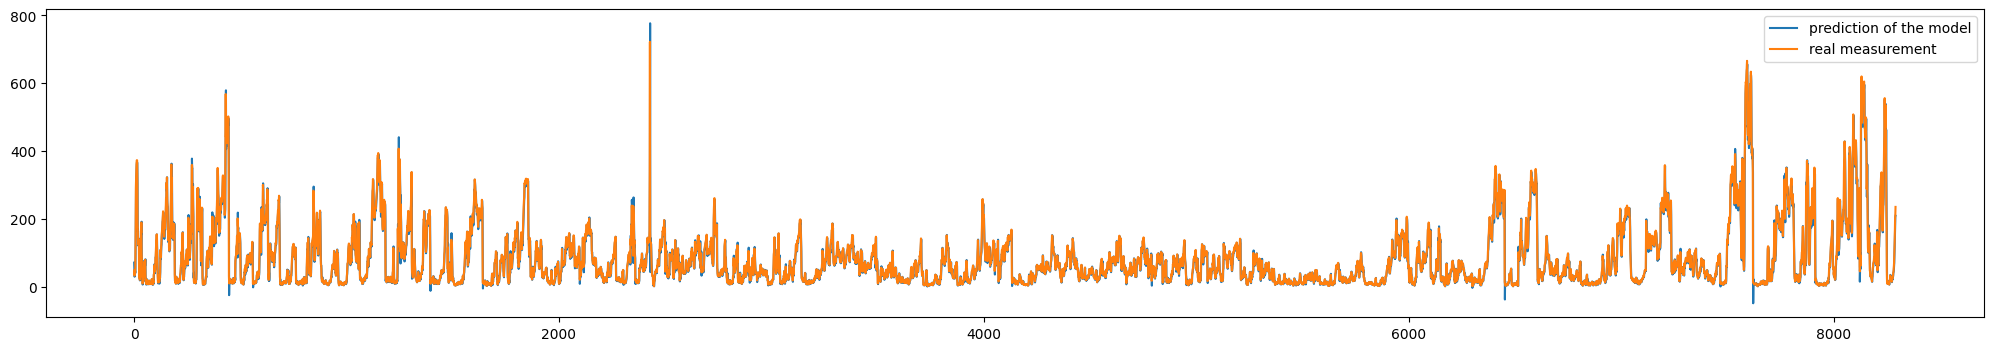

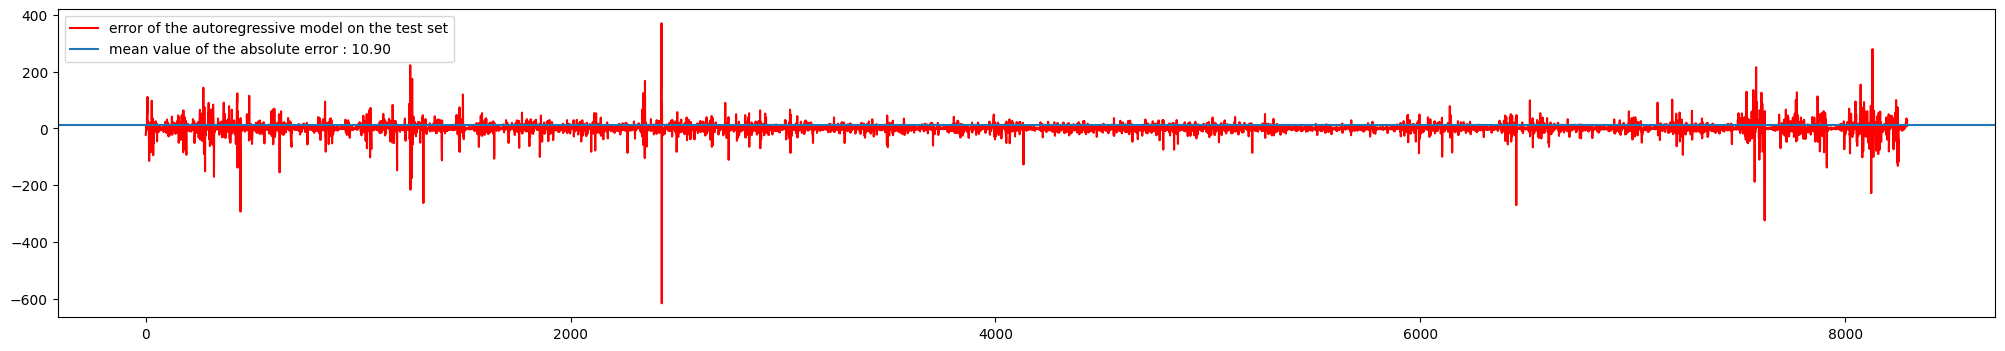

Mean value of the absolute error for the test set :  10.898126930111294
Mean value of the absolute error for the training set :  12.289047240813495


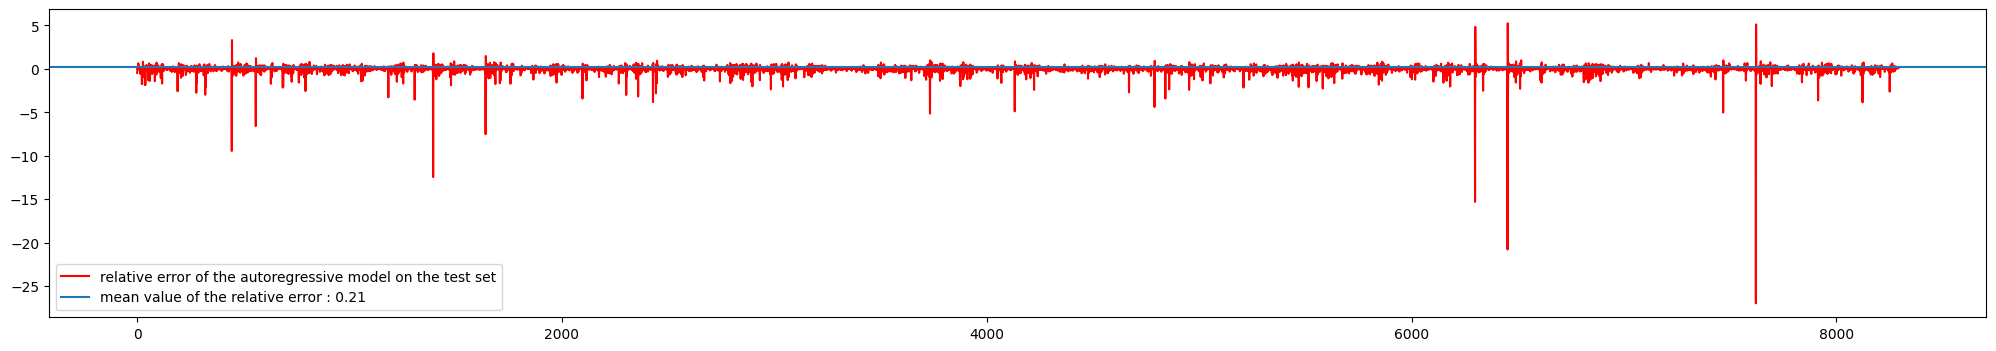

Mean value of the relative error for the test set :  0.2130226476444719
Mean value of the relative error for the training set :  0.2064895471128294


In [12]:
plt.figure(figsize=(25,4))
X_test = np.array([validation_set[:len(validation_set)-3], 
                  validation_set[1:len(validation_set)-2],
                  validation_set[2:len(validation_set)-1]]).T
Y_test_real = validation_set[3:len(validation_set)]

Y_test_predicted = X_test@regress_result.params



plt.plot(np.arange(0,len(Y_test_real)), Y_test_predicted, label='prediction of the model')
plt.plot(np.arange(0,len(Y_test_real)),Y_test_real, label='real measurement')
plt.legend()
plt.show()

Y_test_abs_error = (Y_test_real - Y_test_predicted)
plt.figure(figsize=(25,4))
plt.plot(np.arange(0,len(Y_test_real)),Y_test_abs_error,color='red', label='error of the autoregressive model on the test set')
plt.axhline(np.mean(abs(Y_test_abs_error)), label= "mean value of the absolute error : {0:.2f}".format(np.mean(abs(Y_test_abs_error))))
plt.legend()
plt.show()

print("Mean value of the absolute error for the test set : ", np.mean(abs(Y_test_abs_error)))
print("Mean value of the absolute error for the training set : ", np.mean(abs((Y_auto - X_auto@regress_result.params))))


Y_test_error = (Y_test_real - Y_test_predicted)/Y_test_real
plt.figure(figsize=(25,4))
plt.plot(np.arange(0,len(Y_test_real)),Y_test_error,color='red', label='relative error of the autoregressive model on the test set')
plt.axhline(np.mean(abs(Y_test_error)), label= "mean value of the relative error : {0:.2f}".format(np.mean(abs(Y_test_error))))
plt.legend()
plt.show()

print("Mean value of the relative error for the test set : ", np.mean(abs(Y_test_error)))
print("Mean value of the relative error for the training set : ", np.mean(abs((Y_auto - X_auto@regress_result.params)/Y_auto)))


Comments here:


## 4. Hypothesis tests

------------------------------------------------------------------------------------------------------
4.1. You will compare the average PM2.5 emissions measured at the US embassy in Beijing (PM_US Post_y), during winter with emissions reported by Chinese authorities in Nongzhanguan (PM_Nongzhanguan), a district of Beijing close to the US embassy.

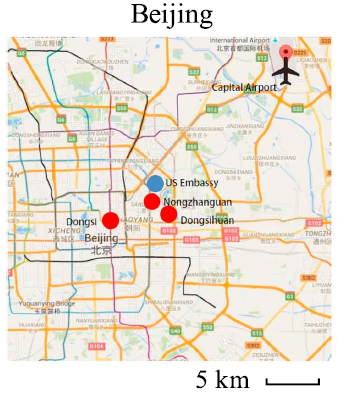


a) Reload the data from 'BeijingPM.csv' file. Keep data from the 1/1/2012 and 31/12/2015 in winter time(season 4). Take care to remove missing data (NA) and keep only days for which PM2.5 emissions are available **both** in Nongzhanguan (PM_Nongzhanguan) and Beijing (PM_US Post), to keep the same number of observations.

------------------------------------------------------------------------------------------------------

In [13]:
#Load les csv en dataframe
beijing_df = pd.read_csv('BeijingPM.csv')

#Définir la colonne qu'on analyse
beijing_column = 'PM_US Post'
nongz_column = 'PM_Nongzhanguan'
year = 'year'

#Filtrer les dataframe de façon à ne garder que les entrées où on a une valeur pour Nongzhanguan et Beijing
new_valid_beijing = beijing_df[~pd.isna(beijing_df[nongz_column]) & ~pd.isna(beijing_df[beijing_column]) & (beijing_df[year] > 2011) & (beijing_df[year] < 2016)]

#Filtrer les dataframe "communs" en saison summer et winter
new_valid_beijing_winter = valid_beijing[valid_beijing["season"] == 4]


b) Perfom a  the Stutent's T test to check if the average hourly PM2.5 emissions are the same in Nongzhanguan and at the US embassy. The null hypothesis is

$H_0$: $\mu_{US} = \mu_{Nongzhanguan}$.

Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?


In [14]:
# Code here


Comment here:


c) Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

Comment here:

d) Apply the Wilcoxon's test to distributions of the hourly PM2.5 emissions in Nongzhanguan and at the US embassy. What can you conclude ?

In [15]:
# Code here


Comment here:

